# Synthetic Data - Basic Example with CTGAN
<a class="anchor" id="top"></a>

Necessary imports:
* [CTGAN Repository](https://github.com/sdv-dev/CTGAN)
* [Table Evaluator Repository](https://github.com/Baukebrenninkmeijer/table-evaluator)
* [SDV Repository](https://github.com/sdv-dev/SDV)



30March2022 - For now,  seaborn==0.11.1 works best with table evaluator has it doesn't produce annoying errors. Check if that's the version you have installed, if not, install it with **python -mpip install seaborn==0.11.1**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#required installs
!pip install --user ctgan
!pip install --user table_evaluator
!pip install --user sdv
!python -mpip install seaborn==0.11.1


We're gonna use the Pima Indians Diabetes Dataset from Kaggle [Link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

As per the description:
"This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage."

This is a simple dataset that presents us with one of the uages of synthetic data, the protection of patient data. We'll see how we can replicate this dataset using a CTGAN. 

## Table of Contents
* [Top of Notebook](#top)
* [Section 1 - Imports](#imports)
* [Section 2 - Get Data](#getdata)
* [Section 3 - Prepare Data](#preparedata)
* [Section 4 - CTGAN](#ctgan)
* [Section 5 - Inspect and Validate](#inspect)

## Section 1 - Imports <a class="anchor" id="imports"></a>
[Back to Top](#top)

In [3]:
#basic data wrangling
import pandas as pd

#synthetic data generator
from ctgan import CTGANSynthesizer

#evaluator tool
from table_evaluator import load_data, TableEvaluator




## Section 2 - Get Data <a class="anchor" id="getdata"></a>
[Back to Top](#top)

In [4]:

diabetes=pd.read_csv(r'Data/diabetes.csv')

In [5]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Section 3 - Prepare Data <a class="anchor" id="preparedata"></a>
[Back to Top](#top)

In this section its important to assure that no na's exist and that the discrete and continuous columns are set.

In [6]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Section 4 - CTGAN <a class="anchor" id="ctgan"></a>
[Back to Top](#top)

In [7]:
list(diabetes.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
# Names of the columns that are discrete
discrete_columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age','Outcome' ]


In [9]:
#basic characteristics of the CTGANSynthesizer
epochs=1000
batch_size=50
generator_dim=(256, 256, 256)
discriminator_dim=(256, 256, 256)

ctgan = CTGANSynthesizer(epochs=epochs, 
                         batch_size=batch_size,
                         verbose=True,
                         generator_dim=generator_dim,
                         discriminator_dim=discriminator_dim)

ctgan.fit(diabetes, discrete_columns)



Epoch 1, Loss G:  3.6484,Loss D: -0.0176
Epoch 2, Loss G:  3.6412,Loss D: -0.2003
Epoch 3, Loss G:  3.7775,Loss D: -0.2528
Epoch 4, Loss G:  3.6617,Loss D: -0.2239
Epoch 5, Loss G:  3.5249,Loss D: -0.2429
Epoch 6, Loss G:  3.4782,Loss D: -0.2563
Epoch 7, Loss G:  3.5037,Loss D:  0.0238
Epoch 8, Loss G:  2.8942,Loss D:  0.3556
Epoch 9, Loss G:  3.0018,Loss D:  0.1043
Epoch 10, Loss G:  3.6626,Loss D:  0.0853
Epoch 11, Loss G:  3.0596,Loss D:  0.0542
Epoch 12, Loss G:  3.1839,Loss D:  0.0962
Epoch 13, Loss G:  3.3580,Loss D:  0.1001
Epoch 14, Loss G:  3.0543,Loss D:  0.0705
Epoch 15, Loss G:  3.0952,Loss D:  0.0634
Epoch 16, Loss G:  3.2820,Loss D:  0.0578
Epoch 17, Loss G:  3.3067,Loss D:  0.1226
Epoch 18, Loss G:  3.4133,Loss D: -0.0925
Epoch 19, Loss G:  3.3521,Loss D:  0.0376
Epoch 20, Loss G:  3.5022,Loss D: -0.0200
Epoch 21, Loss G:  3.2994,Loss D: -0.0079
Epoch 22, Loss G:  3.4230,Loss D:  0.0112
Epoch 23, Loss G:  3.1605,Loss D:  0.0603
Epoch 24, Loss G:  3.5588,Loss D: -0.0220
E

Epoch 195, Loss G: -0.0691,Loss D: -0.1042
Epoch 196, Loss G: -0.6839,Loss D: -0.0514
Epoch 197, Loss G: -0.1925,Loss D:  0.0233
Epoch 198, Loss G: -0.2119,Loss D:  0.0288
Epoch 199, Loss G: -0.0467,Loss D: -0.3409
Epoch 200, Loss G: -0.2748,Loss D:  0.0104
Epoch 201, Loss G: -0.2075,Loss D: -0.0675
Epoch 202, Loss G: -0.2196,Loss D: -0.0728
Epoch 203, Loss G: -0.2685,Loss D: -0.1701
Epoch 204, Loss G: -0.1651,Loss D: -0.5716
Epoch 205, Loss G: -0.1969,Loss D: -0.0774
Epoch 206, Loss G: -0.0623,Loss D: -0.1622
Epoch 207, Loss G: -0.1154,Loss D:  0.0354
Epoch 208, Loss G: -0.5809,Loss D: -0.1499
Epoch 209, Loss G: -0.3019,Loss D:  0.2652
Epoch 210, Loss G: -0.1316,Loss D: -0.2658
Epoch 211, Loss G: -0.3630,Loss D:  0.0901
Epoch 212, Loss G: -0.1904,Loss D:  0.1370
Epoch 213, Loss G: -0.5584,Loss D: -0.2794
Epoch 214, Loss G: -0.3078,Loss D:  0.1025
Epoch 215, Loss G: -0.3864,Loss D: -0.0163
Epoch 216, Loss G: -0.1850,Loss D: -0.0832
Epoch 217, Loss G: -0.0672,Loss D:  0.3102
Epoch 218, 

Epoch 386, Loss G: -0.2998,Loss D: -0.2307
Epoch 387, Loss G: -0.4628,Loss D: -0.0308
Epoch 388, Loss G: -0.2822,Loss D: -0.5948
Epoch 389, Loss G: -0.4431,Loss D: -0.0635
Epoch 390, Loss G: -0.5043,Loss D:  0.0885
Epoch 391, Loss G: -0.5183,Loss D: -0.2151
Epoch 392, Loss G: -0.7445,Loss D: -0.0265
Epoch 393, Loss G: -0.4760,Loss D:  0.1338
Epoch 394, Loss G: -0.7449,Loss D: -0.3679
Epoch 395, Loss G: -0.4302,Loss D: -0.1074
Epoch 396, Loss G: -0.4351,Loss D:  0.0364
Epoch 397, Loss G: -0.2876,Loss D: -0.0518
Epoch 398, Loss G: -0.2311,Loss D:  0.0750
Epoch 399, Loss G: -0.0744,Loss D: -0.2425
Epoch 400, Loss G: -0.0531,Loss D: -0.0813
Epoch 401, Loss G: -0.1486,Loss D:  0.2008
Epoch 402, Loss G: -0.4163,Loss D: -0.2008
Epoch 403, Loss G: -0.4234,Loss D: -0.3689
Epoch 404, Loss G: -0.4948,Loss D: -0.0958
Epoch 405, Loss G: -0.4522,Loss D:  0.1950
Epoch 406, Loss G: -0.2743,Loss D: -0.0709
Epoch 407, Loss G: -0.2285,Loss D:  0.2225
Epoch 408, Loss G: -0.0923,Loss D:  0.1359
Epoch 409, 

Epoch 577, Loss G: -0.0018,Loss D: -0.1716
Epoch 578, Loss G:  0.0132,Loss D:  0.0263
Epoch 579, Loss G: -0.0886,Loss D:  0.2356
Epoch 580, Loss G:  0.0314,Loss D:  0.3090
Epoch 581, Loss G: -0.2659,Loss D: -0.1580
Epoch 582, Loss G: -0.1309,Loss D:  0.2094
Epoch 583, Loss G: -0.4829,Loss D:  0.3776
Epoch 584, Loss G: -0.3880,Loss D: -0.3811
Epoch 585, Loss G: -0.2808,Loss D:  0.2250
Epoch 586, Loss G: -0.6390,Loss D: -0.0565
Epoch 587, Loss G: -0.2624,Loss D:  0.1683
Epoch 588, Loss G:  0.2542,Loss D: -0.1887
Epoch 589, Loss G:  0.3144,Loss D:  0.2122
Epoch 590, Loss G:  0.0396,Loss D: -0.1713
Epoch 591, Loss G: -0.1931,Loss D: -0.2687
Epoch 592, Loss G: -0.4164,Loss D: -0.0375
Epoch 593, Loss G: -0.3441,Loss D:  0.0616
Epoch 594, Loss G: -0.3447,Loss D: -0.6108
Epoch 595, Loss G: -0.4062,Loss D:  0.0123
Epoch 596, Loss G: -0.3780,Loss D: -0.3151
Epoch 597, Loss G: -0.3910,Loss D: -0.5577
Epoch 598, Loss G: -0.0905,Loss D:  0.0154
Epoch 599, Loss G: -0.0241,Loss D: -0.3858
Epoch 600, 

Epoch 768, Loss G: -0.4261,Loss D: -0.1729
Epoch 769, Loss G: -0.3075,Loss D: -0.2401
Epoch 770, Loss G: -0.6068,Loss D: -0.1316
Epoch 771, Loss G: -0.0641,Loss D: -0.1522
Epoch 772, Loss G: -0.0941,Loss D: -0.1529
Epoch 773, Loss G: -0.1969,Loss D: -0.1688
Epoch 774, Loss G: -0.0454,Loss D:  0.2302
Epoch 775, Loss G:  0.1145,Loss D: -0.0609
Epoch 776, Loss G: -0.0971,Loss D:  0.3190
Epoch 777, Loss G:  0.0393,Loss D:  0.0381
Epoch 778, Loss G: -0.3623,Loss D: -0.3004
Epoch 779, Loss G: -0.1894,Loss D: -0.0467
Epoch 780, Loss G: -0.4682,Loss D:  0.0533
Epoch 781, Loss G: -0.2399,Loss D: -0.0731
Epoch 782, Loss G: -0.2473,Loss D: -0.1467
Epoch 783, Loss G:  0.0015,Loss D: -0.1634
Epoch 784, Loss G: -0.2689,Loss D: -0.0127
Epoch 785, Loss G: -0.2564,Loss D: -0.0432
Epoch 786, Loss G: -0.2644,Loss D:  0.3253
Epoch 787, Loss G: -0.1077,Loss D: -0.2097
Epoch 788, Loss G: -0.2167,Loss D:  0.0105
Epoch 789, Loss G: -0.1048,Loss D: -0.1681
Epoch 790, Loss G:  0.1383,Loss D: -0.0681
Epoch 791, 

Epoch 959, Loss G: -0.3034,Loss D:  0.0067
Epoch 960, Loss G:  0.0939,Loss D: -0.0940
Epoch 961, Loss G:  0.3239,Loss D: -0.7280
Epoch 962, Loss G:  0.5168,Loss D:  0.0196
Epoch 963, Loss G:  0.2225,Loss D: -0.3855
Epoch 964, Loss G: -0.1234,Loss D: -0.2558
Epoch 965, Loss G:  0.5565,Loss D: -0.1726
Epoch 966, Loss G: -0.1023,Loss D: -0.3461
Epoch 967, Loss G:  0.1822,Loss D:  0.1606
Epoch 968, Loss G:  0.0081,Loss D: -0.1265
Epoch 969, Loss G: -0.3333,Loss D:  0.3247
Epoch 970, Loss G: -0.3538,Loss D: -0.1589
Epoch 971, Loss G: -0.0234,Loss D:  0.1163
Epoch 972, Loss G:  0.1381,Loss D:  0.1093
Epoch 973, Loss G:  0.0741,Loss D: -0.1789
Epoch 974, Loss G:  0.3150,Loss D: -0.1397
Epoch 975, Loss G:  0.3066,Loss D:  0.0614
Epoch 976, Loss G:  0.3102,Loss D: -0.2768
Epoch 977, Loss G:  0.0122,Loss D: -0.9032
Epoch 978, Loss G:  0.4586,Loss D:  0.1730
Epoch 979, Loss G: -0.2000,Loss D:  0.2006
Epoch 980, Loss G:  0.0799,Loss D:  0.3848
Epoch 981, Loss G: -0.5142,Loss D: -0.1418
Epoch 982, 

In [10]:
# Synthetic copy
samples = ctgan.sample(500)

In [11]:
samples

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,117,72,45,74,43.501386,0.776005,44,1
1,2,85,48,20,158,33.021874,0.460079,22,0
2,1,145,60,12,0,31.638903,0.228316,54,1
3,1,100,58,41,90,30.660082,0.348635,23,0
4,5,197,88,42,0,39.187665,0.202271,36,0
...,...,...,...,...,...,...,...,...,...
495,7,125,66,41,0,31.977973,0.239689,41,1
496,5,152,82,15,0,45.102795,0.502949,37,0
497,5,96,72,0,0,33.546413,0.076733,46,0
498,8,90,0,15,168,19.835421,0.137861,29,0


In [12]:
samples=samples.drop_duplicates()

## Section 4 - Inspect and Validate <a class="anchor" id="inspect"></a>
[Back to Top](#top)

 ### Visual Evaluation 
 table_evaluator was created specifically with GAN generated data.

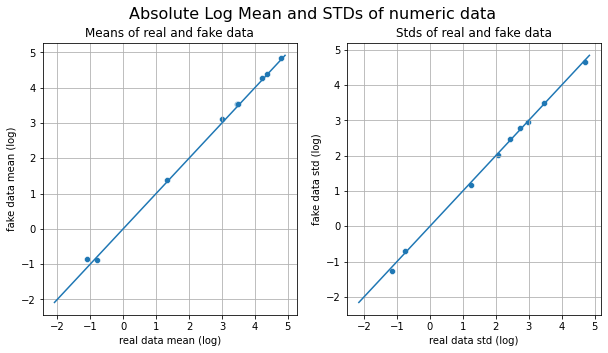

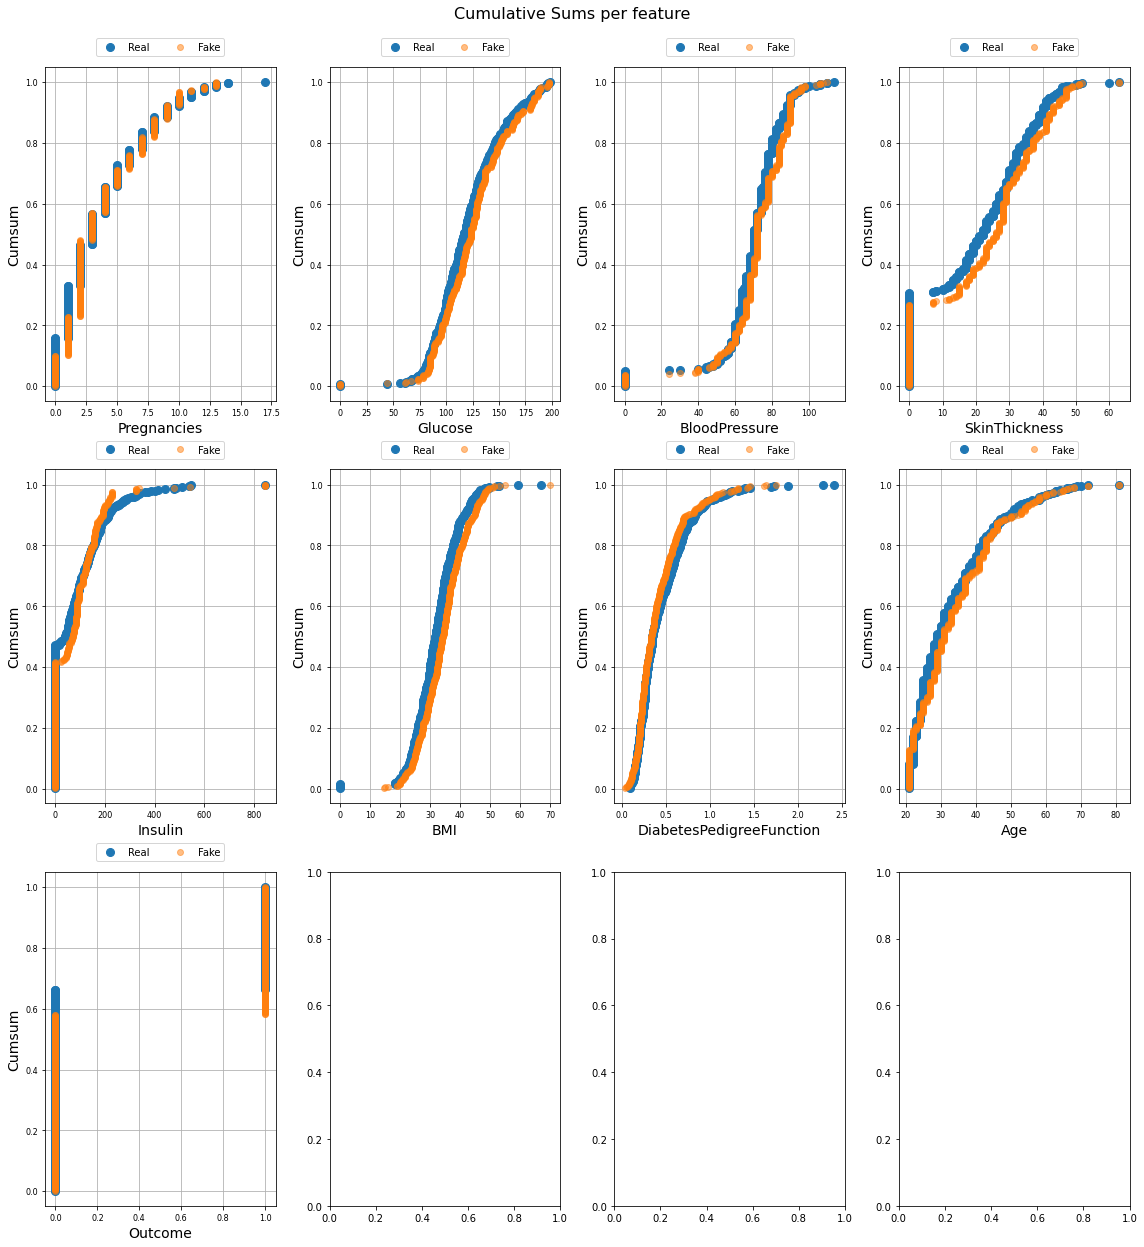

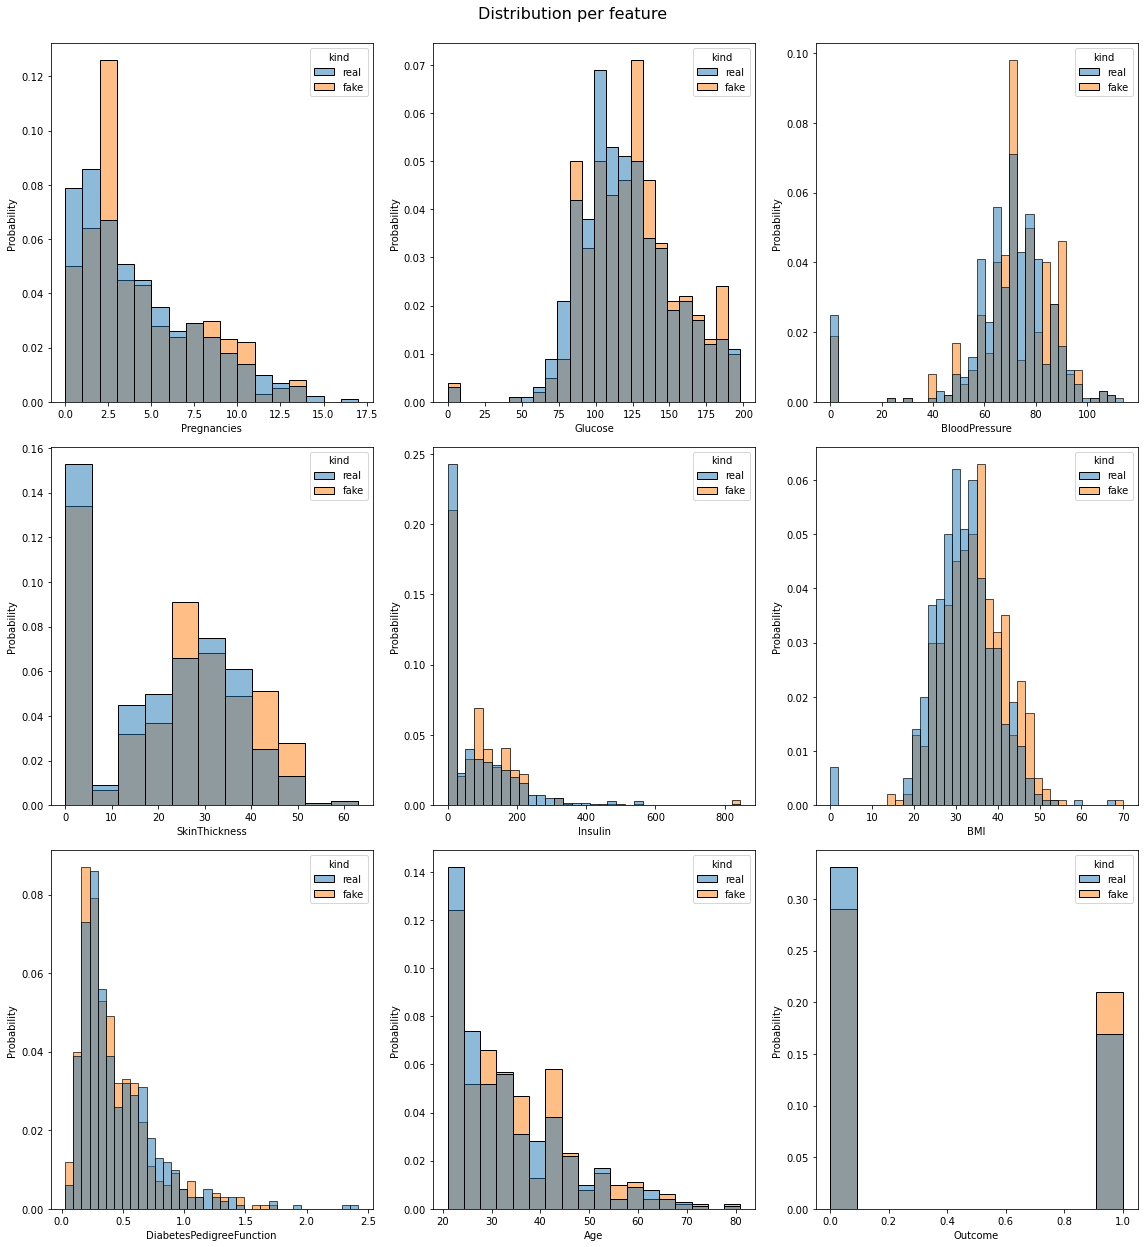

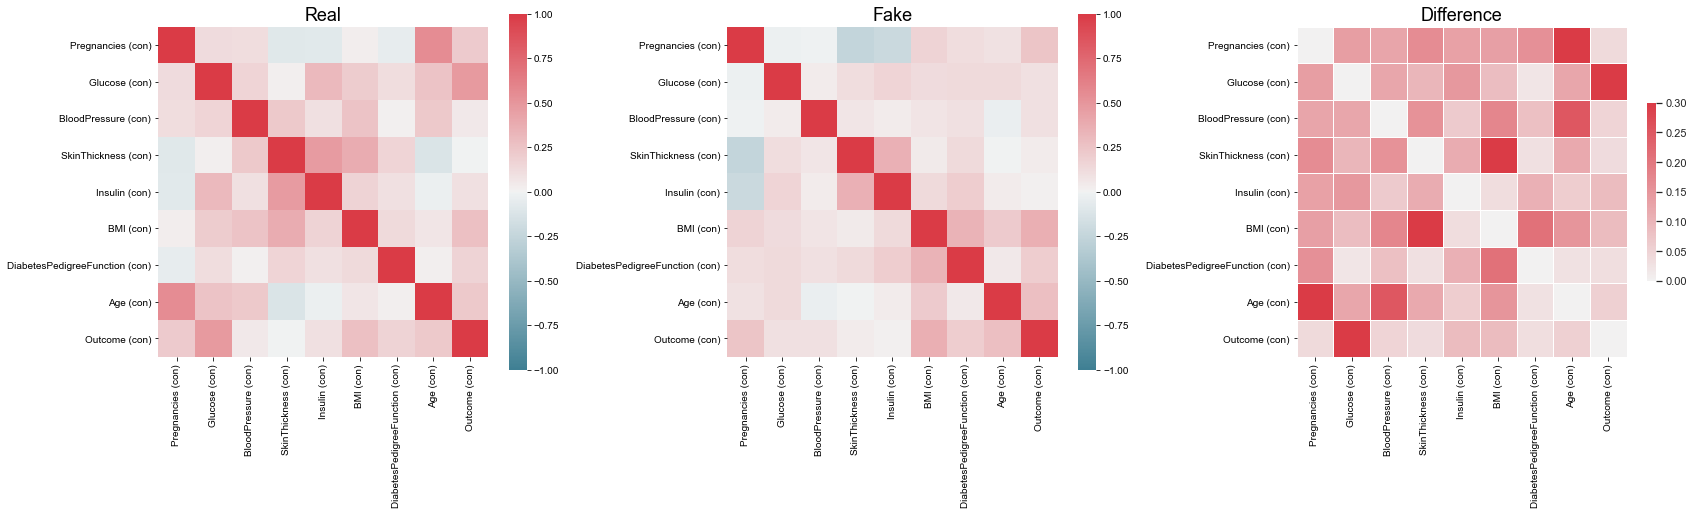

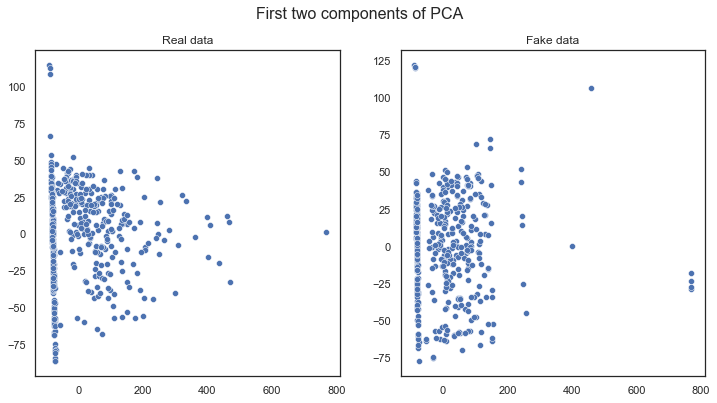

In [13]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(diabetes, samples)
table_evaluator.visual_evaluation()

 ### Numerical Evaluation
 SDV evaluate function to analyze the similarity between real and fake datasets. This function displays aggregated results of all of the similarity metrics from 0 to 1, where 0 begins worst and 1 is ideal.

In [14]:
from sdv.evaluation import evaluate
evaluate(diabetes, samples)


0.6289220630470724